In [1]:
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('WV_asphalt items.csv')
df = df[df.Extension != 0]


In [3]:
df.describe()

,Quantity,Unit Price,Extension
count,18645.000000,18645.000000,1.864500e+04
mean,2668.285806,166.740427,1.207697e+05
std,17518.085453,169.057467,3.285448e+05
min,0.900000,0.010000,1.000000e-02
25%,46.000000,89.150000,9.225000e+03
50%,252.000000,111.500000,3.048000e+04
75%,1332.000000,198.760000,1.198800e+05
max,735644.000000,3900.000000,1.587788e+07


In [4]:
def count_first_digit(data_str):
    mask=df[data_str]>1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=10:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    #print(first_digits)
    unique=(set(first_digits))#a list with unique values of first_digit list
    data_count=[]
    for i in unique:
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage

# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [5]:
count_first_digit('Extension')

(18599,
 [5904, 3040, 2185, 1692, 1366, 1278, 1136, 1071, 927],
 [31.743642131297385,
  16.344964783052852,
  11.747943437819238,
  9.097263293725469,
  7.344480886069143,
  6.871337168664981,
  6.10785526103554,
  5.758374106134738,
  4.984138932200656])

In [6]:
def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]

In [7]:
def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected

    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 30.")    
    return chi_square_stat < 30

In [8]:
total_count,data_count, data_percentage= count_first_digit('Extension')
expected_counts=get_expected_counts(total_count)

In [9]:
chi_square_test(data_count,expected_counts)


Chi-squared Test Statistic = 81.325
Critical value at a P-value of 0.05 is 30.


False

In [10]:
#1st_bar_chart
def bar_chart(data_pct):

    """Make bar chart of observed vs expected 1st digit frequency in percent."""

    fig, ax = plt.subplots()
    index = [i + 1 for i in range(len(data_pct))]  # 1st digits for x-axis
# text for labels, title and ticks
    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title('Data vs. Benford Values', fontsize=15)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)
    # build bars    
    rects = ax.bar(index, data_pct, width=0.95, color='black', label='Data')
    # attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '{:0.1f}'.format(height), ha='center', va='bottom', 

                fontsize=13)
    # plot Benford values as red dots
    ax.scatter(index, BENFORD, s=150, c='red', zorder=2, label='Benford')
    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size':15}, frameon=False)
    plt.show()

    # plot Benford values as red dots

    ax.scatter(index, BENFORD, s=150, c='red', zorder=2, label='Benford')
    # Hide the right and top spines & add legend

    ax.spines['right'].set_visible(False)

    ax.spines['top'].set_visible(False)

    ax.legend(prop={'size':15}, frameon=False)
    plt.show()
    
    #2nd_bar_chart


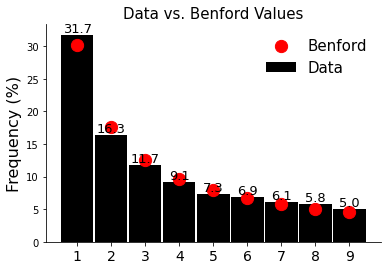

In [11]:
bar_chart(data_percentage)

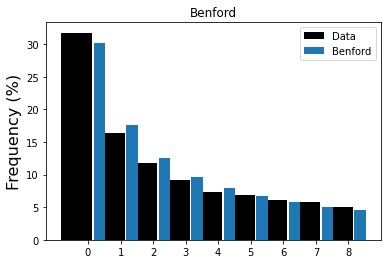

In [12]:
    labels=list(data_percentage)
width = 0.35 
x = np.arange(len(data_percentage)) # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, data_percentage, width=0.95, color='black', label='Data')
rects2 = ax.bar(x + width, BENFORD,width,label='Benford')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Benford')
ax.set_xticks(x)
ax.legend()

plt.show()

In [13]:
expected_counts

[5598, 3273, 2325, 1804, 1469, 1246, 1079, 949, 856]

In [14]:
data_percentage

[31.743642131297385,
 16.344964783052852,
 11.747943437819238,
 9.097263293725469,
 7.344480886069143,
 6.871337168664981,
 6.10785526103554,
 5.758374106134738,
 4.984138932200656]

In [16]:
#astropy.stats.kuiper(data, cdf=<function <lambda>>, args=())